In [1]:
library(ggplot2)

# 1) 
# write the pdf and the cdf
dprob <- function(x) {
    pdf <- ifelse(x >= 1 & x <= 5, x/15, 0)
    return (pdf)
}

# write the cdf
pprob <- function(x) {
    cdf <- rep(0, length(x))
        for (i in 2:length(x)) {
            cdf[i] <- cdf[i - 1] + dprob(x)[i]
        }
    return(cdf)
}

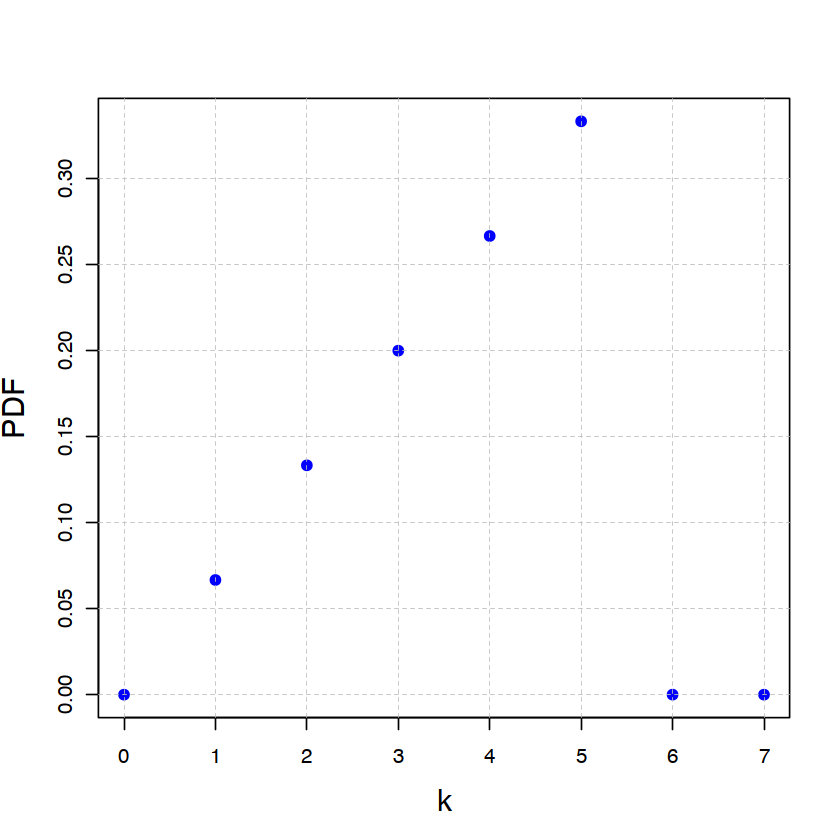

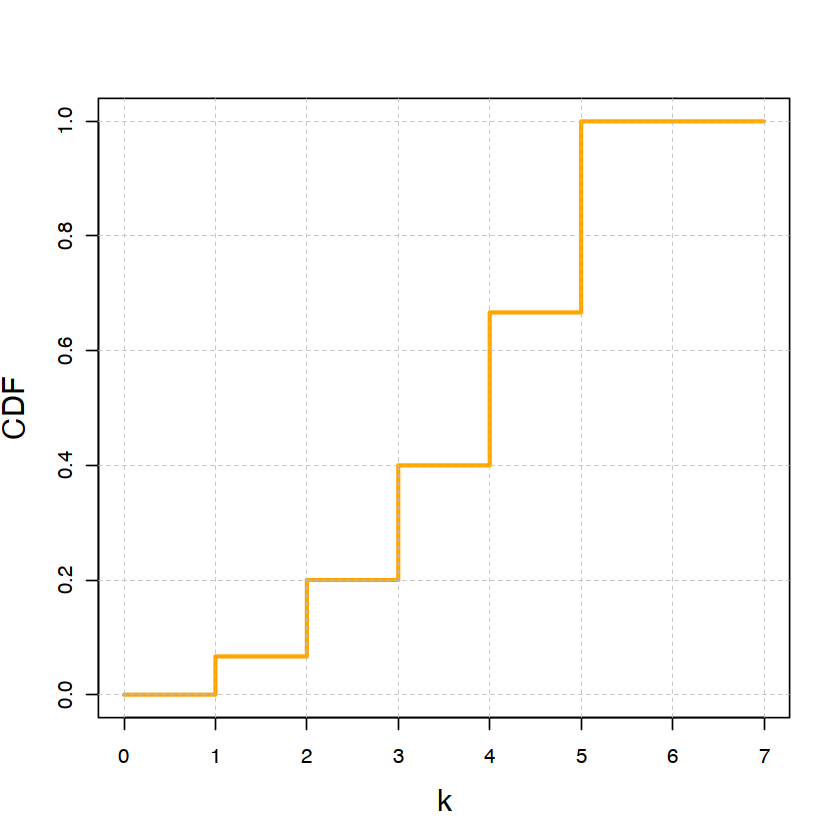

In [53]:
# 2)
k <- seq(0, 7, 1)

# plot pdf and cdf
plot(x = k, y = dprob(k), pch = 19, col = "blue", ylab = "PDF", cex.lab = 1.5) 
grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 0.5)      
plot(x = k, y = pprob(k), type = "s", lwd = 2.5, col = "orange", ylab = "CDF", cex.lab = 1.5) 
grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 0.5)      

In [55]:
# 3)
# find the mean value E
E <- 0
for (i in 1:length(k)) {
    E <- E + k[i] * dprob(k)[i]
}

cat(paste("The mean value of the probability distribution is:", round(E, 2)))

The mean value of the probability distribution is: 3.67

In [56]:
# find the variance Var
E_2 <- 0
for (i in 1:length(k)) {
    E_2 <- E_2 + k[i]^2 * dprob(k)[i]
}

Var <- E_2 - E^2

cat(paste("The variance of the probability distribution is:", round(Var, 2)))

The variance of the probability distribution is: 1.56

In [50]:
# 4)
# find the expected value E[k(6-k)]

E_6 <- 0
for (i in 1:length(k)) {
    E_6 <- E_6 + (k[i] * (6 - k[i])) * dprob(k)[i]
}

cat(paste("The expected value E[k(6−k)] of the probability distribution is:", E_6))

The expected value E[k(6−k)] of the probability distribution is: 7

In [23]:
# 5)
# function that samples from the pdf using the inverse method
rprob <- function(x, n){
    u <- runif(n)
    val <- rep(0, n)
    for (i in 1:n) {
        val[i] <- min(x[pprob(x) >= u[i]])
    }
    return(val)
}

In [24]:
# 6)
# extract 10^5 random numbers and normalize
sampling <- c(table(rprob(k, 10^5)) / sum(table(rprob(k, 10^5))))

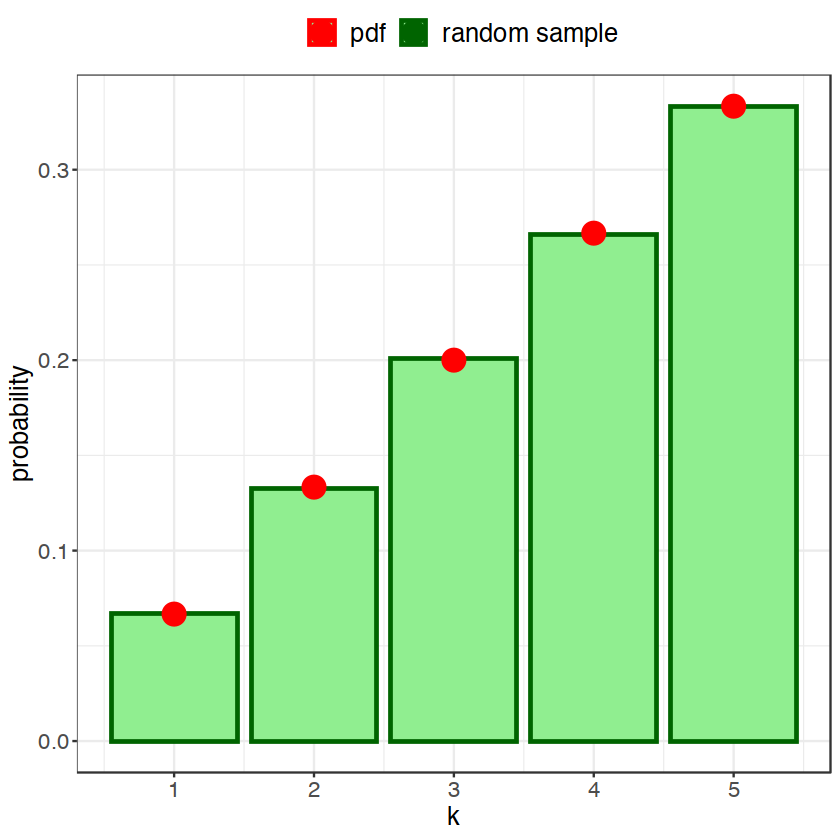

In [52]:
# create the plot
k2 <- 1:5
df <- data.frame(k2, dprob(k2), sampling)
colors <- c("random sample" = "darkgreen", "pdf" = "red")

ggplot(df) + 
    geom_col(aes(x = k2, y = sampling, color = "random sample"), linewidth = 1, fill = "light green") +
    geom_point(aes(x = k2, y = dprob(k2), color = "pdf"), size = 6, group = 1) +
    scale_color_manual(values = colors) +
    labs(x = "k", y = "probability", color = "") +
    theme_bw() +
    theme(legend.title = element_text(size = 17), legend.text = element_text(size = 15), legend.pos = "top") +
    theme(axis.text = element_text(size = 13), axis.title = element_text(size = 15))